In [163]:
import glob
import os
import librosa
import librosa.display
import skimage
import numpy as np
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 



In [164]:
metadata = pd.read_csv("UrbanSound8k/metadata/UrbanSound8K.csv")
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


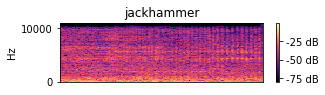

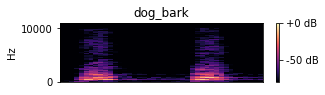

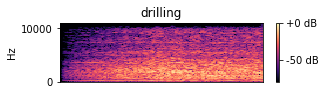

In [4]:
arr = np.array(metadata["slice_file_name"])
fold = np.array(metadata["fold"])
cla = np.array(metadata["class"])

for i in range(192, 197, 2):
    path = 'UrbanSound8k/audio/fold' + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [120]:
feature = []
label = []
fold = []
def parser(row):
    # Function to load files and extract features
    for i in range(8732):
        file_name = 'UrbanSound8k/audio/fold' + str(metadata["fold"][i]) + '/' + metadata["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate).T,axis=0)
        feature.append(mels)
        label.append(metadata["classID"][i])
        fold.append(metadata["fold"][i])
    return [feature, label, fold]

In [169]:
feature = []
label = []
fold = []
def parser(row):
    # Function to load files and extract features
    for i in range(8732):
        file_name = 'UrbanSound8k/audio/fold' + str(metadata["fold"][i]) + '/' + metadata["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        #mels = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate).T,axis=0)
        X = librosa.effects.harmonic(X)
        mels = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate,n_chroma=40, bins_per_octave=80).T,axis=0)
        feature.append(mels)
        label.append(metadata["classID"][i])
        fold.append(metadata["fold"][i])
    return [feature, label, fold]

In [170]:
temp = parser(metadata)
temp = np.array(temp)
data = temp.transpose()

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1751
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=876
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=438
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=219
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=110
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1379
  retu

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1827
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=914
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=457
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1585
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=793
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=397
  retu

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1748
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=874
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1123
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1431
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=716
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=358
  ret

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1709
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=855
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=428
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=214
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1125
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=563
  retu

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1196
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=598
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=299
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1565
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=783
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=392
  retu

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1344
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=672
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1220
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=610
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=2034
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1017
  re

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1957
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=979
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1537
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=769
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1384
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=692
  ret

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1399
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=700
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1292
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1074
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1696
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=848
  re

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1498
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=749
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=375
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1595
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=798
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=399
  retu

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=542
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=271
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1061
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1403
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=702
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=351
  retu

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=606
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=76
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=38
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1943
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=972
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=486
  return 

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=87
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1682
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1372
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=686
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1028
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=257
  retu

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1308
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=654
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1592
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=796
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1390
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=695
  ret

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1416
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=708
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=354
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=177
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=89
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=45
  return 

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1239
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=249
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=125
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1283
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=642
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=321
  retu

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1982
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=991
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=496
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1482
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=135
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1496
  ret

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1797
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=899
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1661
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1179
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=590
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1937
  re

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=757
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1097
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1704
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=852
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=426
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=213
  retu

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1193
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=597
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1854
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=927
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1151
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=576
  ret

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1721
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=431
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1540
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=770
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1100
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=550
  ret

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1181
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=591
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=296
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1578
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=789
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1885
  ret

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1154
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1278
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=639
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1855
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=928
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=464
  ret

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1222
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=2004
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1002
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1162
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1924
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1840
  

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1569
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=785
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1955
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=489
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1816
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1040
  re

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1884
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=942
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=471
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1217
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=609
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1091
  ret

C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1883
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1314
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=657
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1872
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=936
  return f(*args, **kwargs)
C:\Users\Chris\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1568
  re

In [171]:
pd.DataFrame(data)

,0,1,2
0,"[-0.09572134585867499, -0.023102055060073186, ...",3,5
1,"[-0.01330358776631721, 0.010074796295373297, 0...",2,5
2,"[-0.04119498628850144, 0.006361600736572136, 0...",2,5
3,"[-0.026574171030999027, 0.03164294104107135, 0...",2,5
4,"[0.02108862893099689, 0.07377475884816082, 0.0...",2,5
...,...,...,...
8727,"[-0.005632624845972586, -0.014749978526580257,...",1,7
8728,"[0.021677464735864713, -0.031128357608901615, ...",1,7
8729,"[-0.043054214232335845, 0.06833057084514385, 0...",1,7
8730,"[0.004078514367762434, -0.03290266983239778, -...",1,7


In [172]:
data1 = pd.DataFrame(data)
data1 = data1.rename(columns={0: "Feature", 1: "Label", 2: "Fold"})
data1 = data1.sort_values(by=['Fold'])
#data1.to_csv('UrbanSound8k_MFCC.csv')
data1["Feature"][4]

array([0.02108863, 0.07377476, 0.03447937, 0.05114424, 0.04551196,
       0.03663019])

In [180]:
### Train and evaluate via 10-Folds cross-validation ###
accuracies = []

for i in range(1, 11):  # 1-10 to match values in folds df
  # obtain train and test indices
    #test_idx = list(np.where(folds['folds'] == i)[0]) # find all indices for fold i and set as test indices
    #train_idx = list(np.setdiff1d(folds.index.to_numpy(), np.where(folds['folds'] == i)[0])) # everything except fold i as train indices
  
    # use train and test indices to create train and test x/y and reshape them for training our model
    #x_train = X.iloc[train_idx].to_numpy().reshape(len(train_idx), 40, 5, 1)
    #y_train = Y.iloc[train_idx].to_numpy().reshape(len(train_idx),)
    #x_test = X.iloc[test_idx].to_numpy().reshape(len(test_idx), 40, 5, 1)
    #y_test = Y.iloc[test_idx].to_numpy().reshape(len(test_idx),)
    xtrainpd = data1.loc[data1['Fold'] != i]
    xtestpd = data1.loc[data1['Fold'] == i]
    
    train = np.array(xtrainpd)
    test = np.array(xtestpd)
    
    Xtrain = train[:, 0]
    Ytrain = train[:, 1]
    Xtest = test[:, 0]
    Ytest = test[:, 1]

    trainempty = np.empty([train.shape[0], 6])
    testempty = np.empty([test.shape[0], 6])
    print(train.shape)
    print(test.shape)
    for n in range(train.shape[0]):
        trainempty[n] = (Xtrain[n])
    
    for n in range(test.shape[0]):
        testempty[n] = (Xtest[n])
        
    Y_train = to_categorical(Ytrain)
    Y_test = to_categorical(Ytest)
    
    X_train = trainempty.reshape(train.shape[0], 3, 2, 1)
    X_test = testempty.reshape(test.shape[0], 3, 2, 1)
    input_dim = (3, 2, 1)
    
    
    # insert model architecture here (just put the alexnet for reference, will need to update this for each model)
    pool_size = (2, 2)
    kernel_size = (3, 3)
    input_shape = (3, 2, 1)
    num_classes = 10

    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_shape))
    model.add(MaxPool2D(pool_size=(1, 1)))
    model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
    model.add(MaxPool2D(pool_size=(1, 1)))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1024, activation = "tanh"))
    model.add(Dense(10, activation = "softmax"))

    optimizer = keras.optimizers.Adam(lr=1e-4)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model.fit(X_train, Y_train, epochs = 50, batch_size = 50, validation_data = (X_test, Y_test))


    # add accuracy to our accuracies list for comparison
    accuracies.append(model.evaluate(X_test, Y_test)[1])
    # index 0 is validation loss in final epoch, index 1 is validation accuracy in final epoch
    # if we try and look into other metrics, they may be in a different index and 
    # we would need ot make a separate list for those metrics


(7859, 3)
(873, 3)


ValueError: Exception encountered when calling layer "max_pooling2d_222" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_222/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 1, 2, 1], padding="VALID", strides=[1, 1, 2, 1]](Placeholder)' with input shapes: [?,3,1,128].

Call arguments received by layer "max_pooling2d_222" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 3, 1, 128), dtype=float32)

In [76]:
rms_acc = pd.DataFrame(list(zip(range(1,10), accuracies)),
                        columns =['Folds', 'Validation Accuracy']) 

rms_acc

,Folds,Validation Accuracy
0,1,0.200458
1,2,0.266892
2,3,0.220541
3,4,0.127273
4,5,0.102564
5,6,0.177400
6,7,0.220764
7,8,0.270471
8,9,0.287990


In [139]:
chromastft_acc = pd.DataFrame(list(zip(range(1,10), accuracies)),
                        columns =['Folds', 'Validation Accuracy']) 

chromastft_acc

,Folds,Validation Accuracy
0,1,0.428408
1,2,0.384009
2,3,0.401081
3,4,0.390909
4,5,0.537393
5,6,0.394897
6,7,0.447494
7,8,0.382134
8,9,0.503676


In [145]:
np.mean(chromastft_acc["Validation Accuracy"]) 

0.430000149541431

In [52]:
melspectro_acc = pd.DataFrame(list(zip(range(1,10), accuracies)),
                        columns =['Folds', 'Validation Accuracy']) 

melspectro_acc

,Folds,Validation Accuracy
0,1,0.521191
1,2,0.429054
2,3,0.429189
3,4,0.473737
4,5,0.525641
5,6,0.469016
6,7,0.515513
7,8,0.554591
8,9,0.546569


In [ ]:
np.mean(melspectro_acc["Validation Accuracy"]) 

In [153]:
speccon_acc = pd.DataFrame(list(zip(range(1,10), accuracies)),
                        columns =['Folds', 'Validation Accuracy']) 

speccon_acc

,Folds,Validation Accuracy
0,1,0.359679
1,2,0.415541
2,3,0.387027
3,4,0.318182
4,5,0.333333
5,6,0.304982
6,7,0.357995
7,8,0.347395
8,9,0.310049


In [161]:
mfcc_acc = pd.DataFrame(list(zip(range(1,10), accuracies)),
                        columns =['Folds', 'Validation Accuracy']) 

mfcc_acc

,Folds,Validation Accuracy
0,1,0.470790
1,2,0.510135
2,3,0.425946
3,4,0.490909
4,5,0.570513
5,6,0.498177
6,7,0.558473
7,8,0.509926
8,9,0.525735


In [162]:
np.mean(mfcc_acc["Validation Accuracy"]) 

0.5067338016298082

In [8]:
xtrainpd = data1.loc[data1['Fold'] != 9]
xtestpd = data1.loc[data1['Fold'] == 9]

In [9]:
train = np.array(xtrainpd)
test = np.array(xtestpd)

In [10]:
train.shape

(7916, 3)

In [11]:
Xtrain = train[:, 0]
Ytrain = train[:, 1]
Xtest = test[:, 0]
Ytest = test[:, 1]
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(7916,) (7916,) (816,) (816,)


In [12]:
trainempty = np.empty([7916, 128])
testempty = np.empty([816, 128])

In [13]:
trainempty

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
for i in range(7916):
    trainempty[i] = (Xtrain[i])
    
for i in range(816):
    testempty[i] = (Xtest[i])

In [15]:
Y_train = to_categorical(Ytrain)
Y_test = to_categorical(Ytest)

In [16]:
Y_test.shape

(816, 10)

In [17]:
Y_train.shape

(7916, 10)

In [18]:
X_train = trainempty.reshape(7916, 16, 8, 1)
X_test = testempty.reshape(816, 16, 8, 1)
input_dim = (16, 8, 1)

In [19]:
Y_train.shape

(7916, 10)

In [20]:
Y_test.shape

(816, 10)

In [21]:
X_train.shape

(7916, 16, 8, 1)

In [22]:
X_test.shape

(816, 16, 8, 1)

In [23]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))

In [24]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
model.fit(X_train, Y_train, epochs = 90, batch_size = 50, validation_data = (X_test, Y_test))

Epoch 1/90
159/159 [==============================] - 3s 14ms/step - loss: 1.4603 - accuracy: 0.4977 - val_loss: 2.0953 - val_accuracy: 0.4252
Epoch 2/90
159/159 [==============================] - 2s 13ms/step - loss: 1.0844 - accuracy: 0.6412 - val_loss: 2.0978 - val_accuracy: 0.5184
Epoch 3/90
159/159 [==============================] - 2s 13ms/step - loss: 0.8927 - accuracy: 0.7065 - val_loss: 2.3551 - val_accuracy: 0.5625
Epoch 4/90
159/159 [==============================] - 2s 13ms/step - loss: 0.7748 - accuracy: 0.7446 - val_loss: 2.3421 - val_accuracy: 0.5502
Epoch 5/90
159/159 [==============================] - 2s 13ms/step - loss: 0.7193 - accuracy: 0.7620 - val_loss: 2.3873 - val_accuracy: 0.5723
Epoch 6/90
159/159 [==============================] - 2s 13ms/step - loss: 0.6331 - accuracy: 0.7921 - val_loss: 2.5863 - val_accuracy: 0.5919
Epoch 7/90
159/159 [==============================] - 2s 13ms/step - loss: 0.5760 - accuracy: 0.8098 - val_loss: 2.4434 - val_accuracy: 0.5833

Epoch 58/90
159/159 [==============================] - 2s 13ms/step - loss: 0.0792 - accuracy: 0.9715 - val_loss: 4.6648 - val_accuracy: 0.6360
Epoch 59/90
159/159 [==============================] - 2s 13ms/step - loss: 0.0706 - accuracy: 0.9757 - val_loss: 4.0206 - val_accuracy: 0.6348
Epoch 60/90
159/159 [==============================] - 2s 13ms/step - loss: 0.0831 - accuracy: 0.9720 - val_loss: 4.6049 - val_accuracy: 0.6299
Epoch 61/90
159/159 [==============================] - 2s 13ms/step - loss: 0.0901 - accuracy: 0.9693 - val_loss: 4.7086 - val_accuracy: 0.6422
Epoch 62/90
159/159 [==============================] - 2s 13ms/step - loss: 0.0736 - accuracy: 0.9757 - val_loss: 4.6328 - val_accuracy: 0.6360
Epoch 63/90
159/159 [==============================] - 2s 13ms/step - loss: 0.0745 - accuracy: 0.9740 - val_loss: 4.8791 - val_accuracy: 0.6225
Epoch 64/90
159/159 [==============================] - 2s 13ms/step - loss: 0.0714 - accuracy: 0.9764 - val_loss: 4.4984 - val_accuracy:

In [26]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

26/26 [==============================] - 0s 3ms/step - loss: 4.4087 - accuracy: 0.6299
[4.408703804016113, 0.6299019455909729]


In [27]:
predictions.tolist()

[[2.0947471535137652e-10,
  2.180370467508297e-10,
  0.08969760686159134,
  7.774840469210176e-07,
  4.847158672029766e-23,
  0.9100284576416016,
  5.138497049736457e-13,
  4.0093196136261485e-18,
  1.1764932084101787e-10,
  0.00027312999009154737],
 [1.5781538402481754e-12,
  2.52115735684393e-15,
  0.999097466468811,
  0.00026607909239828587,
  1.9057170064229467e-08,
  7.378562279398981e-14,
  1.5409315533634893e-12,
  1.3703049805968703e-09,
  1.021360773734159e-09,
  0.0006365259177982807],
 [2.5293467320608443e-10,
  2.124616038656768e-10,
  0.09126249700784683,
  6.121603632891492e-07,
  3.9744383815957775e-23,
  0.9085127711296082,
  3.555187828158113e-13,
  3.247056962726895e-18,
  9.936076961203355e-11,
  0.00022408603399526328],
 [9.694440450402908e-07,
  2.0924819637002656e-06,
  0.008559933863580227,
  6.306663067334739e-07,
  3.780180161949698e-12,
  3.4372084201095277e-07,
  0.0001835381262935698,
  5.855837733118041e-13,
  5.347391163223504e-14,
  0.9912524819374084],
 

In [28]:
testingdata = pd.DataFrame(test).rename(columns={0: "MFCC", 1: "Label", 2: "Fold"})
testingdata['Pred'] = predictions.tolist()

In [29]:
testingdata

,MFCC,Label,Fold,Pred
0,"[26.964308, 5.80304, 0.32755533, 0.10292106, 0...",5,9,"[2.0947471535137652e-10, 2.180370467508297e-10..."
1,"[0.42540905, 0.16244802, 0.21769492, 0.5993888...",2,9,"[1.5781538402481754e-12, 2.52115735684393e-15,..."
2,"[28.250977, 6.010617, 0.3350602, 0.10066836, 0...",5,9,"[2.5293467320608443e-10, 2.124616038656768e-10..."
3,"[0.0027402462, 0.02031302, 0.049158555, 0.0809...",6,9,"[9.694440450402908e-07, 2.0924819637002656e-06..."
4,"[0.002696536, 0.015370666, 0.043416884, 0.0654...",6,9,"[2.2810104383097496e-06, 8.302382775582373e-05..."
...,...,...,...,...
811,"[5.1203065, 4.169136, 1.9528133, 0.78296727, 0...",9,9,"[0.5341916084289551, 1.9970478856755694e-14, 2..."
812,"[5.263013, 4.943022, 2.8108203, 0.8294959, 0.4...",9,9,"[0.01131468266248703, 1.7928385165344451e-10, ..."
813,"[0.64075047, 0.4836779, 0.16774657, 0.05162232...",9,9,"[0.9864922165870667, 7.288563352858546e-08, 3...."
814,"[0.0075959847, 0.00042499954, 0.00087268214, 0...",3,9,"[8.111754823403317e-09, 1.8514617616816054e-09..."


In [30]:
predmax = []
for i in range (0, 816): 
    predmax.append(np.argmax(testingdata['Pred'][i]))

In [31]:
testingdata['Pred'] = predmax
testingdata

,MFCC,Label,Fold,Pred
0,"[26.964308, 5.80304, 0.32755533, 0.10292106, 0...",5,9,5
1,"[0.42540905, 0.16244802, 0.21769492, 0.5993888...",2,9,2
2,"[28.250977, 6.010617, 0.3350602, 0.10066836, 0...",5,9,5
3,"[0.0027402462, 0.02031302, 0.049158555, 0.0809...",6,9,9
4,"[0.002696536, 0.015370666, 0.043416884, 0.0654...",6,9,2
...,...,...,...,...
811,"[5.1203065, 4.169136, 1.9528133, 0.78296727, 0...",9,9,0
812,"[5.263013, 4.943022, 2.8108203, 0.8294959, 0.4...",9,9,5
813,"[0.64075047, 0.4836779, 0.16774657, 0.05162232...",9,9,0
814,"[0.0075959847, 0.00042499954, 0.00087268214, 0...",3,9,3


In [32]:
testingdata.loc[testingdata['Pred'] == testingdata['Label']]

,MFCC,Label,Fold,Pred
0,"[26.964308, 5.80304, 0.32755533, 0.10292106, 0...",5,9,5
1,"[0.42540905, 0.16244802, 0.21769492, 0.5993888...",2,9,2
2,"[28.250977, 6.010617, 0.3350602, 0.10066836, 0...",5,9,5
9,"[0.8016201, 0.043181147, 0.03994533, 0.0340896...",2,9,2
10,"[0.019060785, 0.060645852, 0.2157282, 0.976138...",9,9,9
...,...,...,...,...
805,"[0.0035193262, 0.004206527, 0.0037760253, 0.00...",3,9,3
806,"[0.0014204778, 0.0042470447, 0.01066111, 0.030...",3,9,3
807,"[0.0055542514, 0.061240286, 0.080139205, 0.565...",4,9,4
808,"[0.005848587, 0.04182565, 0.06844774, 0.051983...",3,9,3


In [33]:
correct = testingdata.loc[testingdata['Pred'] == testingdata['Label']]
percentright = []

In [34]:
for i in range(0, 10):
    x = len(correct.loc[correct['Pred'] == i])/len(testingdata.loc[testingdata['Label'] == i])
    percentright.append(x)

In [35]:
percentright

[0.09,
 0.90625,
 0.53,
 0.62,
 0.5,
 0.9438202247191011,
 0.3225806451612903,
 0.7682926829268293,
 0.926829268292683,
 0.78]

In [38]:
# For Reading in the data for the models
#All_X = pd.read_csv("allFeaturesData/All_X.csv").to_numpy().reshape(8732, 40, 5, 1)
#All_Y = pd.read_csv("allFeaturesData/All_Y.csv").to_numpy().reshape(8732,)
#All_folds = pd.read_csv("allFeaturesData/All_folds.csv").to_numpy().reshape(8732,)

ValueError: cannot reshape array of size 3238459 into shape (8732,40,5,1)